# 1. Data Loading and Preprocessing

In [2]:
#importing libraries
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

#import the dataset as csv file
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1. age: 
   - Age in years.

2. sex: 
   - 0 = Female
   - 1 = Male

3. cp (Chest pain types): 
   - 0 = Typical angina
   - 1 = Atypical angina
   - 2 = Non-angina pain
   - 3 = Asymptomatic

4. trestbps (Resting blood pressure): 
   - Measured in mmHg.
   - High blood pressure is considered 140 mmHg or above.

5. chol (Serum cholestoral): 
   - Measured in mg/dL.
   - Includes low-density lipoprotein (LDL), high-density lipoprotein (HDL), and triglycerides.
   - Calculation often involves HDL + LDL + 0.2 * triglycerides.
   - Levels higher than 200 mg/dL are of concern.

6. fbs (Fasting blood sugar): 
   - 0 = False (blood sugar ≤ 120 mg/dL)
   - 1 = True (blood sugar > 120 mg/dL)
   - Levels higher than 126 mg/dL may indicate diabetes.

7. restecg (Resting electrocardiographic results): 
   - 0 = Normal
   - 1 = Abnormal ST-T wave
   - 2 = Showing probable or definite left ventricular hypertrophy

8. *thalach (Maximum heart rate achieved)*: 
   - Measured in beats per minute (bpm).

9. exang (Exercise induced angina): 
   - 0 = No exercise induced angina (Negative)
   - 1 = Exercise induced angina present (Positive)

10. oldpeak (ST depression induced by exercise relative to rest): 
    - Represents the extent of abnormality in electrocardiogram (ECG) due to exercise.
  
11. slope (Slope of the peak exercise ST segment): 
    - 0 = Upsloping
    - 1 = Horizontal
    - 2 = Downsloping

12. ca (Number of major vessels colored by fluoroscopy): 
    - Ranges from 0 to 3.
    - Colored vessels indicate blood flow; absence of color might indicate a clot.

13. thal (Thallium scintigraphy): 
    - 3 = Normal
    - 6 = Fixed defect
    - 7 = Reversible defect

14. target (Heart Disease): 
    - 0 = No heart disease (Benign)
    - 1 = Presence of heart disease (Malignant)


# Handling Missing values

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#Check out data types, missing values and more
df.info()

print()
print(f'Shape of the dataset')
print(f'Number of Features: {df.shape[1]}')
print(f'Number of Observations: {df.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Shape of the dataset
Number of Features: 14
Number of Observations: 303


In [5]:
#Check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# convert categorical variables into dummy/indicator variables


In [8]:
#Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'])

In [10]:
# Display the cleaned dataset
print(df.head())

   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target  ...  \
0   63    1       145   233    1      150      0      2.3   0       1  ...   
1   37    1       130   250    0      187      0      3.5   0       1  ...   
2   41    0       130   204    0      172      0      1.4   0       1  ...   
3   56    1       120   236    0      178      0      0.8   0       1  ...   
4   57    0       120   354    0      163      1      0.6   0       1  ...   

   restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  thal_0  thal_1  \
0          1          0          0        1        0        0       0       1   
1          0          1          0        1        0        0       0       0   
2          1          0          0        0        0        1       0       0   
3          0          1          0        0        0        1       0       0   
4          0          1          0        0        0        1       0       0   

   thal_2  thal_3  
0       0       0  
1   

# 2.Data Analysis

In [12]:
# Calculate the average age of patients with and without heart disease
avg_age_with_heart_disease = df[df['target'] == 1]['age'].mean()
avg_age_without_heart_disease = df[df['target'] == 0]['age'].mean()
print("Average age of patients with heart disease:", avg_age_with_heart_disease)
print("Average age of patients without heart disease:", avg_age_without_heart_disease)

Average age of patients with heart disease: 52.4969696969697
Average age of patients without heart disease: 56.60144927536232


In [18]:
# Determine the distribution of chest pain types among patients
print(df.columns)
cp_distribution = df['cp_0'].value_counts()
print("Distribution of chest pain types:\n", cp_distribution)
cp_distribution1 = df['cp_1'].value_counts()
print("Distribution of chest pain types:\n", cp_distribution1)
cp_distribution2 = df['cp_2'].value_counts()
print("Distribution of chest pain types:\n", cp_distribution2)
cp_distribution3 = df['cp_3'].value_counts()
print("Distribution of chest pain types:\n", cp_distribution3)

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'thal_0',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')
Distribution of chest pain types:
 0    160
1    143
Name: cp_0, dtype: int64
Distribution of chest pain types:
 0    253
1     50
Name: cp_1, dtype: int64
Distribution of chest pain types:
 0    216
1     87
Name: cp_2, dtype: int64
Distribution of chest pain types:
 0    280
1     23
Name: cp_3, dtype: int64


In [20]:
# Find the correlation between thalach (maximum heart rate) and age
correlation_thalach_age = df['thalach'].corr(df['age'])
print("Correlation between thalach and age:", correlation_thalach_age)


Correlation between thalach and age: -0.39852193812106756


In [21]:
# Analyze the effect of sex on the presence of heart disease
sex_effect = df.groupby('sex')['target'].mean()
print("Effect of sex on heart disease:\n", sex_effect)

Effect of sex on heart disease:
 sex
0    0.750000
1    0.449275
Name: target, dtype: float64


# Summary insights of Data analysis


1. Average Age of Patient:
   - Average age of patients with heart disease:52.4969696969697
   - Average age of patients without heart disease:56.60144927536232
   - Insight: Patients with heart disease tend to be slightly older on average compared to those without heart disease.

2. Distribution of Chest Pain Types:
   - Distribution:
     - Type 0 (Typical angina): 143
     - Type 1 (Atypical angina):50 
     - Type 2 (Non-angina pain):87 
     - Type 3 (Asymptomatic): 23
   - Insight: Most patients in the dataset experience typical angina or non-angina pain.

3. Correlation between Thalach and Age:-0.39852193812106756
   - Correlation Value: 
   - Insight: There is a negative correlation between maximum heart rate (thalach) and age.

4. Effect of Sex on Heart Disease:
   - Effect:
     - Female:  0.750000
     - Male: 0.449275

# 3.Data Visualization

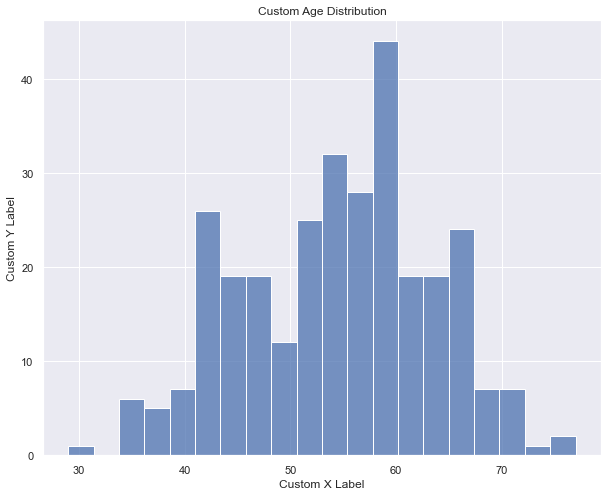

In [30]:
# Plot a histogram of the age distribution of patients
plt.figure(figsize=(10, 8))  # Larger figure size
sns.histplot(data=df, x='age', bins=20, kde=False)  # More bins, no KDE
plt.title('Custom Age Distribution')  # Custom title
plt.xlabel('Custom X Label')  # Custom x-axis label
plt.ylabel('Custom Y Label')  # Custom y-axis label
plt.grid(True)# No grid lines
plt.show()


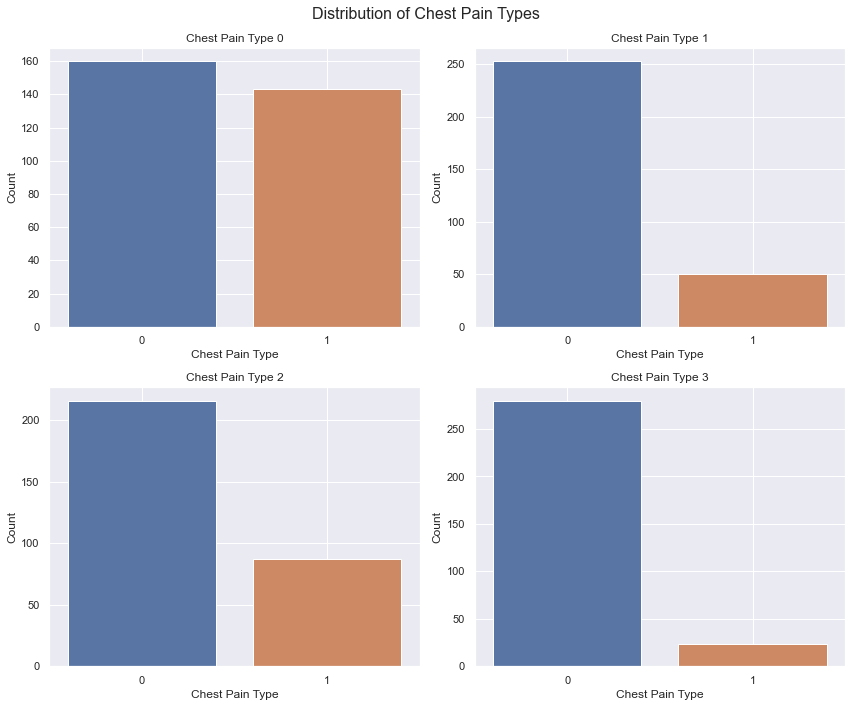

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chest pain types: cp_0, cp_1, cp_2, cp_3
chest_pain_types = ['cp_0', 'cp_1', 'cp_2', 'cp_3']

# Create subplots for each chest pain type
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Distribution of Chest Pain Types', fontsize=16)

for i, cp_type in enumerate(chest_pain_types):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    sns.countplot(data=df, x=cp_type, ax=ax)
    ax.set_title(f'Chest Pain Type {i}')
    ax.set_xlabel('Chest Pain Type')
    ax.set_ylabel('Count')
    ax.grid(True)

plt.tight_layout()
plt.show()


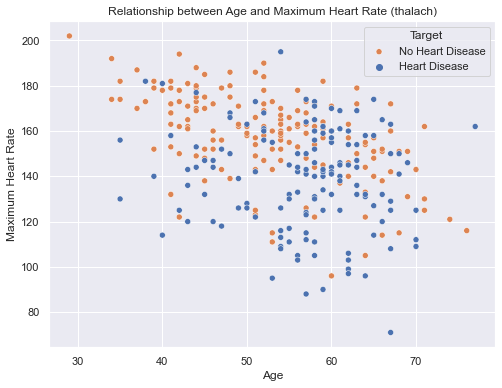

In [28]:
# Plot a scatter plot to show the relationship between thalach (maximum heart rate) and age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target')
plt.title('Relationship between Age and Maximum Heart Rate (thalach)')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.grid(True)
plt.legend(title='Target', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

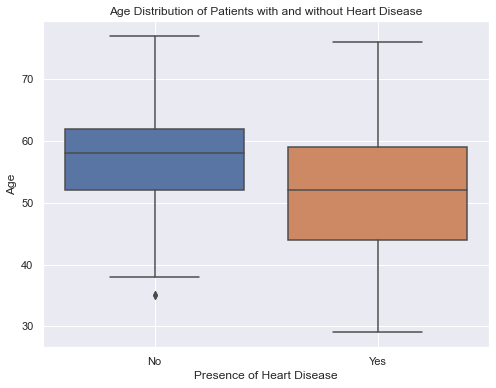

In [29]:
# Create a box plot to compare the age distribution of patients with and without heart disease
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='age')
plt.title('Age Distribution of Patients with and without Heart Disease')
plt.xlabel('Presence of Heart Disease')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(True)
plt.show()

# Summary insights for data visualization:

Summary insights for data visualization:

1. Age Distribution of Patients:
   - The histogram shows that the majority of patients fall within the age range of approximately 40 to 70 years.
   - There is a slight positive skew, with more patients in the older age groups.
   - The kernel density estimate (KDE) provides a smoothed curve showing the overall trend.

2. Distribution of Chest Pain Types:
   - The bar chart displays the distribution of chest pain types (`cp`) among patients.
   - Chest pain type 0 (`cp_0`) appears to be the most common, followed by types 1, 2, and 3.
   - Understanding these pain types can help diagnose heart conditions.

3. Relationship between Age and Maximum Heart Rate (thalach):
   - The scatter plot shows how maximum heart rate (`thalach`) varies with age.
   - Generally, younger patients tend to have higher maximum heart rates.
   - The legend distinguishes between patients with and without heart disease.

4. Age Distribution of Patients with and without Heart Disease:
   - The box plot compares the age distribution for patients with and without heart disease.
   - Patients with heart disease (target = 1) tend to be slightly older than those without (target = 0).
   - The median age for patients with heart disease is higher.

# 4. Advanced Analysis (using numpy):


In [32]:
# Calculate the correlation matrix for all numerical features in the dataset
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)



Correlation Matrix:
                 age       sex  trestbps      chol       fbs   thalach  \
age        1.000000 -0.098447  0.279351  0.213678  0.121308 -0.398522   
sex       -0.098447  1.000000 -0.056769 -0.197912  0.045032 -0.044020   
trestbps   0.279351 -0.056769  1.000000  0.123174  0.177531 -0.046698   
chol       0.213678 -0.197912  0.123174  1.000000  0.013294 -0.009940   
fbs        0.121308  0.045032  0.177531  0.013294  1.000000 -0.008567   
thalach   -0.398522 -0.044020 -0.046698 -0.009940 -0.008567  1.000000   
exang      0.096801  0.141664  0.067616  0.067023  0.025665 -0.378812   
oldpeak    0.210013  0.096093  0.193216  0.053952  0.005747 -0.344187   
ca         0.276326  0.118261  0.101389  0.070511  0.137979 -0.213177   
target    -0.225439 -0.280937 -0.144931 -0.085239 -0.028046  0.421741   
cp_0       0.138253  0.089621  0.021447  0.070684 -0.060190 -0.376561   
cp_1      -0.147399 -0.041249 -0.081851 -0.012750 -0.060649  0.248317   
cp_2      -0.059432 -0.116588 

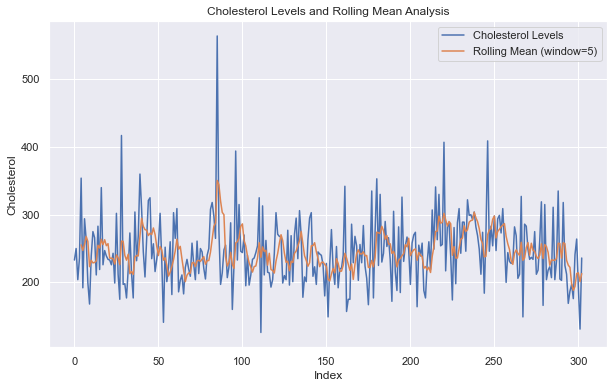

In [33]:
# Perform a rolling mean analysis on the chol (cholesterol) levels with a window size of 5
df['chol_rolling_mean'] = df['chol'].rolling(window=5).mean()

# Plot the rolling mean of cholesterol levels
plt.figure(figsize=(10, 6))#Creates a new figure with a specified size (10 inches wide and 6 inches tall).
plt.plot(df['chol'], label='Cholesterol Levels')#Plots the original cholesterol levels.
plt.plot(df['chol_rolling_mean'], label='Rolling Mean (window=5)')#Plots the rolling mean on the same graph.
plt.title('Cholesterol Levels and Rolling Mean Analysis')#Sets the title of the plot.
plt.xlabel('Index')# Labels the x-axis as “Index.”
plt.ylabel('Cholesterol')#Labels the y-axis as “Cholesterol.”
plt.legend()#Adds a legend to differentiate between the original levels and the rolling mean.
plt.grid(True)#Displays grid lines on the plot.
plt.show()# Shows the plot.

Summary Insights:

1. Cholesterol Levels and Risk:
   - Cholesterol results provide information about different types of cholesterol in the blood.
   - High levels of LDL cholesterol (often called "bad" cholesterol) can double a person's risk of heart disease and stroke.
   - When cholesterol levels are high, fatty deposits can build up in the arteries, narrowing and hardening them, which can reduce blood flow to the heart.
   - Other risk factors for cardiovascular problems include high blood pressure, obesity, diabetes, smoking, and lack of exercise¹.

2. Cholesterol Measurement Units:
   - In the United States, cholesterol is measured in milligrams (mg) of cholesterol per deciliter (dL) of blood (mg/dL).
   - Healthy ranges for most adults:
     - LDL: Less than 100 mg/dL
     - HDL ("good" cholesterol): 40 to 60 mg/dL (higher is better)
     - Total cholesterol: Less than 200 mg/dL⁵.

3. Rolling Mean Analysis:
   - The rolling mean of cholesterol levels (with a window size of 5) helps smooth out fluctuations.
   - Observing trends in the rolling mean can provide insights into cholesterol variations over time.
   - Consider individual particle sizes and patterns (large vs. small particles) for a comprehensive assessment of cardiovascular risk³.

# Bonus:

In [34]:
#Create a function that can take a patient's data as input and return a prediction of whe based on simple thresholding rules.



def predict_heart_disease(df):
    """
    Predicts the presence of heart disease based on simple thresholding rules.
    
    Parameters:
    - patient_data (dict): Dictionary containing patient data for prediction.
    
    Returns:
    - prediction (str): Prediction ('Present' or 'Absent').
    """
    # Define threshold values based on analysis or domain knowledge
    age_threshold = 50  # Example threshold for age
    chol_threshold = 240  # Example threshold for cholesterol levels
    
    # Extract patient data
    age = df['age']
    chol = df['chol']
    sex = df['sex']
    cp = df['cp']
    thalach = df['thalach']
    
    # Simple thresholding rules for prediction
    if (age > age_threshold and chol > chol_threshold) or (sex == 1 and cp > 1):
        prediction = 'Present'  # Heart disease present
    else:
        prediction = 'Absent'   # No heart disease
    
    return prediction

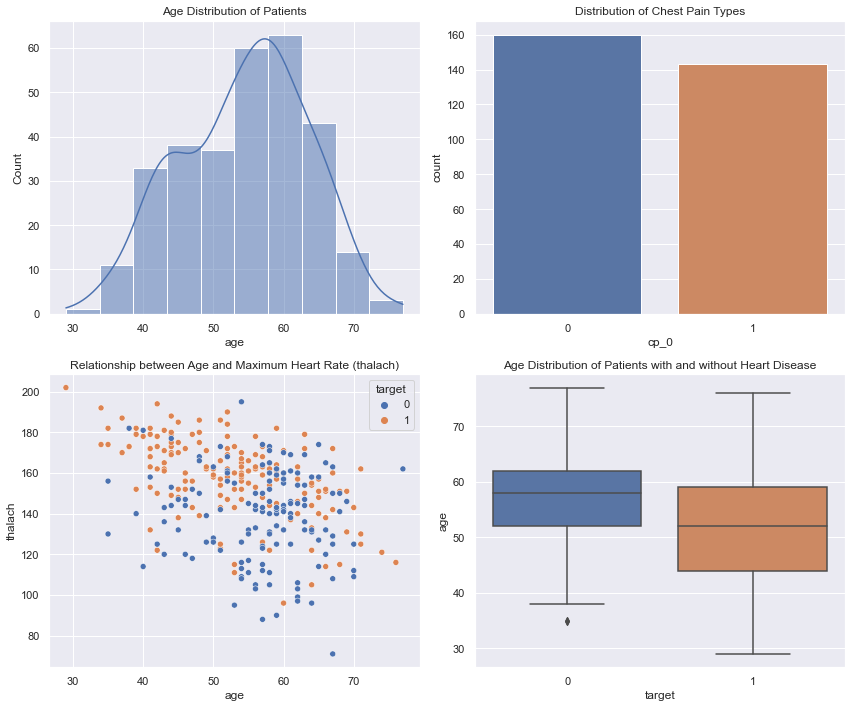

In [37]:
# Use subplots to combine multiple visualizations into one figure for better comparison.
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming heart_data is loaded and cleaned as before

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Subplot 1: Histogram of age distribution
sns.histplot(data=df, x='age', bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution of Patients')

# Subplot 2: Bar chart of chest pain types distribution
sns.countplot(data=df, x='cp_0', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Chest Pain Types')

# Subplot 3: Scatter plot of thalach vs age
sns.scatterplot(data=df, x='age', y='thalach', hue='target', ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Age and Maximum Heart Rate (thalach)')

# Subplot 4: Box plot of age distribution by heart disease presence
sns.boxplot(data=df, x='target', y='age', ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution of Patients with and without Heart Disease')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

C:\Users\Lakshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Lakshmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Lakshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Lakshmi\anaconda3\lib\site-packages

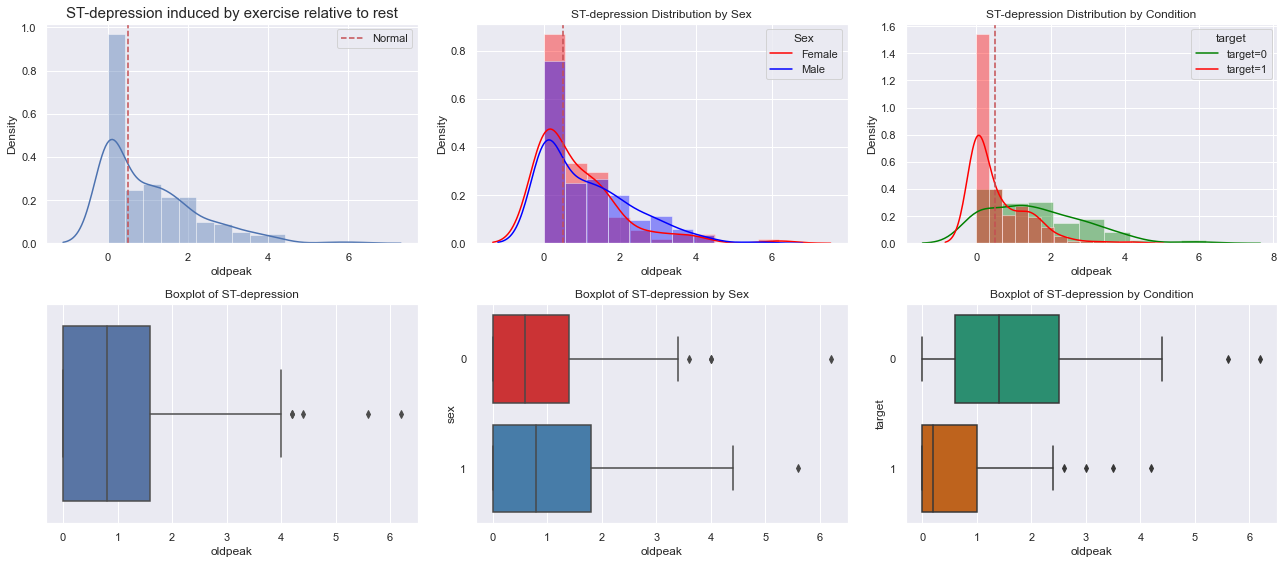

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

def heart_functions_sex(data):
    """
    Plot distributions of ST_depression for Sex and Condition.
    
    Parameters:
    - data (DataFrame): DataFrame containing the heart disease data.
    """
    fig = plt.figure(figsize=(18, 8))

    # ST-depression induced by exercise relative to rest
    plt.subplot(2, 3, 1)
    sns.distplot(data['oldpeak'])
    plt.title('ST-depression induced by exercise relative to rest', fontsize=15)
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['oldpeak'], orient='h')
    plt.title('Boxplot of ST-depression')

    # ST-depression for Sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['sex'] == 0]['oldpeak']
    chol_male = data[data['sex'] == 1]['oldpeak']
    sns.distplot(chol_female, color='red')
    sns.distplot(chol_male, color='blue')
    plt.title('ST-depression Distribution by Sex')
    plt.gca().legend(title='Sex', labels=['Female', 'Male'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['oldpeak'], y=data['sex'],
                palette='Set1', orient='h')
    plt.title('Boxplot of ST-depression by Sex')

    # ST-depression for Condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['target'] == 0]['oldpeak']
    thalach_m = data[data['target'] == 1]['oldpeak']
    sns.distplot(thalach_b, color='green')
    sns.distplot(thalach_m, color='red')
    plt.title('ST-depression Distribution by Condition')
    plt.gca().legend(title='target', labels=['target=0', 'target=1'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['oldpeak'], y=data['target'],
                palette='Dark2', orient='h')
    plt.title('Boxplot of ST-depression by Condition')

    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame containing the heart disease data
heart_functions_sex(df)